In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import time
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
import sklearn.metrics
from sklearn.model_selection import train_test_split
import math
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor
from sklearn.utils import resample
from sklearn.metrics import log_loss

cross = nn.CrossEntropyLoss()

## Data Processing

In [5]:
x_train = pd.read_csv('./Data with correct player_atts/x_train.csv')
x_val = pd.read_csv('./Data with correct player_atts/x_val.csv')
x_test = pd.read_csv('./Data with correct player_atts/x_test.csv')

y_train = pd.read_csv('./Data with correct player_atts/y_train.csv')
y_val = pd.read_csv('./Data with correct player_atts/y_val.csv')
y_test = pd.read_csv('./Data with correct player_atts/y_test.csv')

x_train.shape, x_val.shape, x_test.shape

((8766, 53), (824, 53), (836, 53))

In [104]:
## creating different training set for ensemble learning


x1, x1_val, y1, y1_val = train_test_split(x_train,y_train, test_size = 8/84, random_state =1) 
x2, x2_val, y2, y2_val = train_test_split(x_train,y_train, test_size = 8/84, random_state =2) 
x3, x3_val, y3, y3_val = train_test_split(x_train,y_train, test_size = 8/84, random_state =3) 



#check distribution of classes
y_train['target'].value_counts(normalize=True)

0    0.459160
2    0.287132
1    0.253708
Name: target, dtype: float64

## Training

In [114]:
class LinearNN():
    def __init__(self, num_layers, sizes, activation_type, drop_out):
        self.model = self.n_layer_net(num_layers, sizes, activation_type, drop_out)
        self.activation_type = activation_type
        self.drop_out_p = drop_out
        self.num_layers = num_layers
        self.activation_type = activation_type
        
    
    def n_layer_net(self, num_layers, sizes, activation_type, drop_out):
        assert len(sizes) == num_layers
  
        if num_layers ==4:
            model = nn.Sequential(nn.Linear(input_size, sizes[0]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[0]), nn.Linear(sizes[0], sizes[1]),
                    activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[1]), nn.Linear(sizes[1], sizes[2]), activation_type, nn.Dropout(p=drop_out), 
                    nn.BatchNorm1d(sizes[2]), nn.Linear(sizes[2], sizes[3]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[3]), nn.Linear(sizes[3],
                    output_size), nn.Softmax(dim = 1)
                        )     
        elif num_layers ==5:
            model = nn.Sequential(nn.Linear(input_size, sizes[0]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[0]), nn.Linear(sizes[0], sizes[1]),
                    activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[1]), nn.Linear(sizes[1], sizes[2]), activation_type, nn.Dropout(p=drop_out), 
                    nn.BatchNorm1d(sizes[2]), nn.Linear(sizes[2], sizes[3]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[3]), nn.Linear(sizes[3],
                    sizes[4]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[4]), nn.Linear(sizes[4], output_size), nn.Softmax(dim = 1)
                        )  
        elif num_layers ==6:
            model = nn.Sequential(nn.Linear(input_size, sizes[0]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[0]), nn.Linear(sizes[0], sizes[1]),
                    activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[1]), nn.Linear(sizes[1], sizes[2]), activation_type, nn.Dropout(p=drop_out), 
                    nn.BatchNorm1d(sizes[2]), nn.Linear(sizes[2], sizes[3]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[3]), nn.Linear(sizes[3],
                    sizes[4]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[4]), nn.Linear(sizes[4], sizes[5]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[5]), nn.Linear(sizes[5], output_size), nn.Softmax(dim = 1)
                        )
        elif num_layers ==7:
            model = nn.Sequential(nn.Linear(input_size, sizes[0]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[0]), nn.Linear(sizes[0], sizes[1]),
                    activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[1]), nn.Linear(sizes[1], sizes[2]), activation_type, nn.Dropout(p=drop_out), 
                    nn.BatchNorm1d(sizes[2]), nn.Linear(sizes[2], sizes[3]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[3]), nn.Linear(sizes[3],
                    sizes[4]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[4]), nn.Linear(sizes[4], sizes[5]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[5]), nn.Linear(sizes[5], sizes[6]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[6]),  nn.Linear(sizes[6], output_size), nn.Softmax(dim = 1)
                        )
        elif num_layers ==8:
            model = nn.Sequential(nn.Linear(input_size, sizes[0]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[0]), nn.Linear(sizes[0], sizes[1]),
                    activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[1]), nn.Linear(sizes[1], sizes[2]), activation_type, nn.Dropout(p=drop_out), 
                    nn.BatchNorm1d(sizes[2]), nn.Linear(sizes[2], sizes[3]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[3]), nn.Linear(sizes[3],
                    sizes[4]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[4]), nn.Linear(sizes[4], sizes[5]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[5]), nn.Linear(sizes[5], sizes[6]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[6]),nn.Linear(sizes[6], sizes[7]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[7]),  nn.Linear(sizes[7], output_size), nn.Softmax(dim = 1)
                        )
        elif num_layers ==9:
            model = nn.Sequential(nn.Linear(input_size, sizes[0]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[0]), nn.Linear(sizes[0], sizes[1]),
                    activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[1]), nn.Linear(sizes[1], sizes[2]), activation_type, nn.Dropout(p=drop_out), 
                    nn.BatchNorm1d(sizes[2]), nn.Linear(sizes[2], sizes[3]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[3]), nn.Linear(sizes[3],
                    sizes[4]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[4]), nn.Linear(sizes[4], sizes[5]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[5]), nn.Linear(sizes[5], sizes[6]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[6]),nn.Linear(sizes[6], sizes[7]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[7]),nn.Linear(sizes[7], sizes[8]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[8]),  nn.Linear(sizes[8], output_size), nn.Softmax(dim = 1)
                        )
        elif num_layers ==10:
            model = nn.Sequential(nn.Linear(input_size, sizes[0]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[0]), nn.Linear(sizes[0], sizes[1]),
                    activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[1]), nn.Linear(sizes[1], sizes[2]), activation_type, nn.Dropout(p=drop_out), 
                    nn.BatchNorm1d(sizes[2]), nn.Linear(sizes[2], sizes[3]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[3]), nn.Linear(sizes[3],
                    sizes[4]), activation_type, nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[4]), nn.Linear(sizes[4], sizes[5]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[5]), nn.Linear(sizes[5], sizes[6]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[6]),nn.Linear(sizes[6], sizes[7]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[7]),nn.Linear(sizes[7], sizes[8]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[8]),nn.Linear(sizes[8], sizes[9]), activation_type, 
                    nn.Dropout(p=drop_out), nn.BatchNorm1d(sizes[9]),  nn.Linear(sizes[9], output_size), nn.Softmax(dim = 1)
                        )
        else:
            print('Invalid num_layers: choose between 4 and 7')
        return model

In [133]:
input_size = len(x_train.drop(columns ='match_api_id').columns)
output_size = 3


model4 = LinearNN(5, [128,256,128,32,16], nn.ReLU(), 0.5)
model5 = LinearNN(5, [128,512,256,128,32], nn.ReLU(), 0.5)
model6 = LinearNN(5, [64,512,256,128,32], nn.ReLU(), 0)
model7 = LinearNN(6, [128,256,256,128,32,16], nn.ReLU(), 0.5)
model8 = LinearNN(6, [64,256,256,128,64,32], nn.ReLU(), 0)
model9 = LinearNN(6, [256,512,512,128,32,16], nn.ReLU(), 0.5)
model10 = LinearNN(7, [64,256,256,128,32,16,8], nn.ReLU(), 0.5)
model11 = LinearNN(7, [128,256,256,128,32,16,8], nn.ReLU(), 0)
model12 = LinearNN(7, [256,512,128,64,32,16,8], nn.ReLU(), 0.5)
model13 = LinearNN(8, [64,128,256,128,64,32,16,8], nn.ReLU(), 0.5)
model14 = LinearNN(8, [128,256,256,128,64,32,16,8], nn.ReLU(), 0.5)
model15 = LinearNN(8, [256,512,512,128,32,16,8,8], nn.ReLU(), 0.5)
model13 = LinearNN(9, [64,128,256,256,128,64,32,16,8], nn.ReLU(), 0.5)
model14 = LinearNN(9, [128,256,256,128,128,64,32,16,8], nn.ReLU(), 0.5)
model15 = LinearNN(9, [256,512,512,256,128,32,16,8,8], nn.ReLU(), 0.5)
model13 = LinearNN(10, [64,128,256,256,256,128,64,32,16,8], nn.ReLU(), 0.5)
model14 = LinearNN(10, [128,256,256,512,256,128,64,32,16,8], nn.ReLU(), 0.5)
model15 = LinearNN(10, [256,512,512,256,256,128,32,16,8,8], nn.ReLU(), 0.5)


## Ensemble Learning

In [147]:
def train(model, X_train, Y_train, X_val, Y_val, epochs, batch_size, learning_rate):
    #Scale data
    X_train, X_val = X_train.drop(columns='match_api_id'),  X_val.drop(columns='match_api_id')
    StandardScaler = preprocessing.StandardScaler().fit(X_train)
    X_train, X_val = StandardScaler.transform(X_train), StandardScaler.transform(X_val)

    loss, counter, losses, losses_val= 0, 0, [], []
    
    dataset = TensorDataset(Tensor(X_train), torch.Tensor(Y_train['target'].values) )
    train_loader = DataLoader(dataset, batch_size = batch_size, shuffle=False)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9,0.999), weight_decay=0.1)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size= 25 , gamma = 0.1)
    
    #Train Model
    t = time.time()
    for epoch in range(epochs):
        for x, y in iter(train_loader):
            model.train()
 
            y_pred = model(x)
            loss = cross(y_pred, y.long())
            losses.append(loss.item())
            
            loss.backward()
            model.zero_grad()
            optimizer.step()
            optimizer.zero_grad()
            
            with torch.no_grad():
                y_val_pred = model(Tensor(X_val))
                loss_val = cross(y_val_pred, Tensor(Y_val['target'].values).long())
                losses_val.append(loss_val.item())

            if counter % 300 ==0:
                print('Loss after iteration {}: {}'.format(counter, loss.item()))
                
            counter+=1 
        scheduler.step()
    time.time()-t        


    print('Elapsed time: {} s'.format(time.time()-t))  
    
    plt.plot(range(len(losses)), losses, label = 'train')
    plt.plot(range(len(losses)), losses_val, label = 'val')
    plt.legend(loc="lower left")
    plt.show()
    
    #Eval
    print('Train Accuracy, Log Loss: {}'.format(evaluate(model, X_train, Y_train)))
    print('Val Accuracy, Log Loss: {}'.format(evaluate(model, X_val, Y_val)))
    
    

In [90]:
def evaluate(model, x, y):
    model.eval()
    with torch.no_grad():
        pred = model(Tensor(x))
    global pred_results 
    pred_results = pd.Series(pred.max(1).indices)

    return sklearn.metrics.accuracy_score(pred_results, y['target']), log_loss(y['target'], pred) 

In [149]:
# Build Network
input_size = len(x_train.drop(columns ='match_api_id').columns)
hidden_sizes = [128,256,256,128,32,16]
output_size = 3
prob = 0.5
# Build a feed-forward network
LinearNN1 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                          nn.Dropout(p=prob),
                         nn.BatchNorm1d(hidden_sizes[0]),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                          nn.Dropout(p=prob),
                         nn.BatchNorm1d(hidden_sizes[1]),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                        nn.ReLU(),
                          nn.Dropout(p=prob),
                         nn.BatchNorm1d(hidden_sizes[2]),
                        nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                        nn.ReLU(),
                          nn.Dropout(p=prob),
                         nn.BatchNorm1d(hidden_sizes[3]),
                        nn.Linear(hidden_sizes[3], hidden_sizes[4]),
                        nn.ReLU(),
                         nn.Dropout(p=prob),
                         nn.BatchNorm1d(hidden_sizes[4]),
                         nn.Linear(hidden_sizes[4], output_size),
                      nn.Softmax(dim = 1)
                        )



Loss after iteration 0: 1.09862220287323
Elapsed time: 11.959004163742065 s


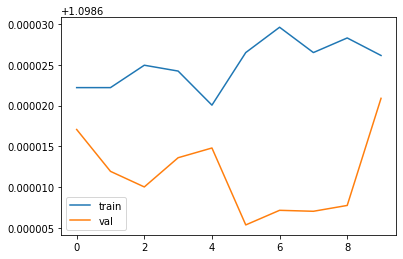

Train Accuracy, Log Loss: (0.25494893456058504, 1.0986207668003587)
Val Accuracy, Log Loss: (0.24191616766467067, 1.0986211920926672)


In [152]:
train(LinearNN1, x1, y1, x1_val, y1_val,  10, len(x1), 0.001)


Loss after iteration 0: 1.051770567893982
Elapsed time: 16.478911876678467 s


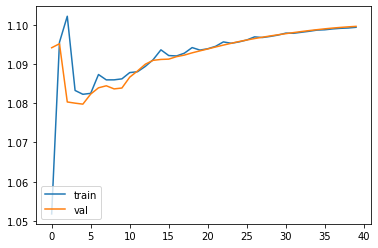

Train Accuracy, Log Loss: (0.25494893456058504, 1.1013096284180928)
Val Accuracy, Log Loss: (0.24191616766467067, 1.1017518046373378)


In [148]:
train(model5.model, x1, y1, x1_val, y1_val,  10, 2048, 0.01)
# train(model8.model, x1, y1, x1_val, y1_val,  20, 2048, 0.01)
# train(model11.model, x1, y1, x1_val, y1_val,  20, 2048, 0.01)

In [778]:
# torch.save(LinearNN1, './nn1.pt')
# torch.save(LinearNN2, './nn2.pt')
# torch.save(LinearNN3, './nn3.pt')

In [704]:
def ensemble_predict(models, training_data, training_labels, x_val, y_val):
    ensemble = []
    val_pred_ensemble = 0
    for i,model in enumerate(models):
        StandardScaler = preprocessing.StandardScaler().fit(training_data[i].iloc[:,1:])
        X_train = pd.DataFrame(StandardScaler.transform(training_data[i].iloc[:,1:]), index = training_data[i]['match_api_id'], columns = training_data[i].iloc[:,1:].columns)
        X_val = pd.DataFrame(StandardScaler.transform(x_val.iloc[:,1:]), index = x_val['match_api_id'], columns = x_val.iloc[:,1:].columns)
        
        model.eval()
        with torch.no_grad():
            val_pred = model(Tensor(X_val.values))
            train_pred = model(Tensor(X_train.values))
        y_val_pred = pd.Series(val_pred.max(1).indices)
        y_train_pred = pd.Series(train_pred.max(1).indices)
        
        val_pred_ensemble += val_pred
        print('model: {}'.format(i))
        print('Train accuracy: {}'.format(sklearn.metrics.accuracy_score(y_train_pred, training_labels[i]['target'])))
        print('Val accuracy: {}'.format(sklearn.metrics.accuracy_score(y_val_pred, y_val['target'])))
        
    global y_ens
    y_ens = pd.Series(val_pred_ensemble.max(1).indices)
    print('Ensemble Val accuracy: {}'.format(sklearn.metrics.accuracy_score(y_ens, y_val['target'])))


In [772]:
ensemble_predict([LinearNN1,LinearNN2,LinearNN3], [x1,x2,x3], [y1,y2,y3], x_val, y_val)

model: 0
Train accuracy: 0.5629726585223968
Val accuracy: 0.5362473347547975
model: 1
Train accuracy: 0.5158522396742292
Val accuracy: 0.523454157782516
model: 2
Train accuracy: 0.5218150087260035
Val accuracy: 0.5458422174840085
Ensemble Val accuracy: 0.5511727078891258


In [773]:
ensemble_predict([LinearNN1,LinearNN3], [x1,x3], [y1,y3], x_val, y_val)

model: 0
Train accuracy: 0.5629726585223968
Val accuracy: 0.5362473347547975
model: 1
Train accuracy: 0.5218150087260035
Val accuracy: 0.5458422174840085
Ensemble Val accuracy: 0.5501066098081023


In [774]:
ensemble_predict([LinearNN1,LinearNN2], [x1,x2], [y1,y2], x_val, y_val)

model: 0
Train accuracy: 0.5629726585223968
Val accuracy: 0.5362473347547975
model: 1
Train accuracy: 0.5158522396742292
Val accuracy: 0.523454157782516
Ensemble Val accuracy: 0.5415778251599147


In [775]:
ensemble_predict([LinearNN2,LinearNN3], [x2,x3], [y2,y3], x_val, y_val)

model: 0
Train accuracy: 0.5158522396742292
Val accuracy: 0.523454157782516
model: 1
Train accuracy: 0.5218150087260035
Val accuracy: 0.5458422174840085
Ensemble Val accuracy: 0.5479744136460555


In [707]:
y_ens.value_counts()

 1    1007
-1     305
dtype: int64